In [1]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.3 MB 5.3 MB/s 
     |████████████████████████████████| 163 kB 82.2 MB/s 
     |████████████████████████████████| 7.6 MB 74.7 MB/s 


In [2]:
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures

model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased")
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/536M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

In [3]:
model.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_37 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
Total params: 109,483,778
Trainable params: 109,483,778
Non-trainable params: 0
_________________________________________________________________


In [4]:
import tensorflow as tf
import pandas as pd

In [5]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [6]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [7]:
df = pd.read_csv("/content/drive/MyDrive/Crypto_Prediction/Dataset/output.csv")

In [8]:
df.head()

,Unnamed: 0,Unnamed: 0.1,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,...,high,low,open,close,volume,adj_close,Vader_Comp,Vader_Pos,Vader_Neg,Vader_Neu
0,0,0,Will Roadhouse | CEO | Roadhouse International,USA & Thailand Hotel Listings,USA - Thailand - Costa Rica\nOff-Market Hotel ...,2009-03-16 18:36:15,9150.0,128.0,47.0,False,...,35284.34375,33213.660156,35284.34375,33746.003906,2.672155e+10,33746.003906,0.0000,0.000,0.000,1.000
1,1,1,PlattsburghBTC,"Plattsburgh, NY","฿ miner that sells extra GH, so come mine with...",2015-08-29 17:25:50,3447.0,1818.0,291.0,False,...,35284.34375,33213.660156,35284.34375,33746.003906,2.672155e+10,33746.003906,0.0000,0.000,0.000,1.000
2,2,2,🌋TripleVolcanoBTCGang🌋,teh Mewn,Volcano Pleb. 39.9K #BTC Gang forever. Tweets ...,2020-05-31 02:08:03,155.0,648.0,7276.0,False,...,35284.34375,33213.660156,35284.34375,33746.003906,2.672155e+10,33746.003906,0.0000,0.000,0.000,1.000
3,3,3,"Zhongshan Liren aka ""Sushi Satoshi""",Hong Kong,Love #bitcoin #ethereum\nHourly chart analysis...,2012-02-11 06:43:12,131.0,593.0,2417.0,False,...,35284.34375,33213.660156,35284.34375,33746.003906,2.672155e+10,33746.003906,-0.3182,0.000,0.268,0.732
4,4,4,• RIS BIG WIN 🐿,"Calabarzon, Republic of the Ph",MA•PA💛,2018-01-13 07:25:36,126.0,2326.0,17207.0,False,...,35284.34375,33213.660156,35284.34375,33746.003906,2.672155e+10,33746.003906,0.3595,0.128,0.000,0.872


In [9]:
df.drop(["Unnamed: 0", "user_name", "user_location", "user_description", "user_created", "user_followers", "user_friends", "user_favourites", "user_verified", "date", "hashtags", "source", "is_retweet", "high", "low", "open", "close", "volume", "adj_close", "Vader_Pos", "Vader_Neg", "Vader_Neu"], axis = 1, inplace = True)

In [10]:
df.drop(["Unnamed: 0.1"], axis = 1, inplace = True)

In [11]:
df.head()

,text,Vader_Comp
0,#Thailand #Boutiquehotels For Sale! \n#willroa...,0.0000
1,#Ilovebitcoin because people never assume that...,0.0000
2,#bitcoin #fiat $Link https://t.co/J9nYUQZdsM,0.0000
3,possible london hard fork be delayed to august...,-0.3182
4,Join here! @lolomiiiii\n@theapyung @MissusViol...,0.3595


In [12]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

In [13]:
len(test)

317335

In [14]:
len(train)

1269339

# Note:
len(test) is 317335

len(train) is 1269339

DATA_COLUMN is text

LABEL_COLUMN is Vader_Comp

In [15]:
InputExample(guid=None,
             text_a = "Hello, world",
             text_b = None,
             label = 1)

InputExample(guid=None, text_a='Hello, world', text_b=None, label=1)

In [16]:
train = train.rename(columns = {'text':'DATA_COLUMN','Vader_Comp':"LABEL_COLUMN"})
test = test.rename(columns = {'text':'DATA_COLUMN','Vader_Comp':"LABEL_COLUMN"})

In [17]:
train.head()

,DATA_COLUMN,LABEL_COLUMN
1229317,@1CrypticPoet Share with me the interview wh...,0.3612
789913,Thoughts on $BTC #Bitcoin! See hossein007700's...,0.0000
1288099,@kucoincom i'm sure that BITCOIN dominance is ...,0.9201
918741,Red week to scare peeps out before we shoot up...,-0.4753
292194,#Bitcoin price in US Dollar #BTC $usd #BTCUSD ...,-0.2732


In [18]:
test.head()

,DATA_COLUMN,LABEL_COLUMN
466582,@ZipFlip4 @GrizzlyDark2 @NewsAsset You must be...,-0.6224
1288995,I support this concept and the psychological f...,0.9368
872321,#Bitcoin #Btc #Crypto #cryptocurrency \n\n‘The...,0.4404
473919,Don't be a bear at support..🧐\n#Bitcoin https:...,0.4019
1569321,@homoda_ex @DefiPost #BTC \n\nWill be $25368\n...,0.0000


In [19]:
def convert_data_to_examples(train, test, DATA_COLUMN, LABEL_COLUMN): 
  train_InputExamples = train.apply(lambda x: InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = x[DATA_COLUMN], 
                                                          text_b = None,
                                                          label = x[LABEL_COLUMN]), axis = 1)

  validation_InputExamples = test.apply(lambda x: InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = x[DATA_COLUMN], 
                                                          text_b = None,
                                                          label = x[LABEL_COLUMN]), axis = 1)
  
  return train_InputExamples, validation_InputExamples

  train_InputExamples, validation_InputExamples = convert_data_to_examples(train, 
                                                                           test, 
                                                                           'DATA_COLUMN', 
                                                                           'LABEL_COLUMN')
  
def convert_examples_to_tf_dataset(examples, tokenizer, max_length=128):
    features = [] # -> will hold InputFeatures to be converted later

    for e in examples:
        # Documentation is really strong for this method, so please take a look at it
        input_dict = tokenizer.encode_plus(
            e.text_a,
            add_special_tokens=True,
            max_length=max_length, # truncates if len(s) > max_length
            return_token_type_ids=True,
            return_attention_mask=True,
            pad_to_max_length=True, # pads to the right by default # CHECK THIS for pad_to_max_length
            truncation=True
        )

        input_ids, token_type_ids, attention_mask = (input_dict["input_ids"],
            input_dict["token_type_ids"], input_dict['attention_mask'])

        features.append(
            InputFeatures(
                input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids, label=e.label
            )
        )

    def gen():
        for f in features:
            yield (
                {
                    "input_ids": f.input_ids,
                    "attention_mask": f.attention_mask,
                    "token_type_ids": f.token_type_ids,
                },
                f.label,
            )

    return tf.data.Dataset.from_generator(
        gen,
        ({"input_ids": tf.int32, "attention_mask": tf.int32, "token_type_ids": tf.int32}, tf.int64),
        (
            {
                "input_ids": tf.TensorShape([None]),
                "attention_mask": tf.TensorShape([None]),
                "token_type_ids": tf.TensorShape([None]),
            },
            tf.TensorShape([]),
        ),
    )


DATA_COLUMN = 'DATA_COLUMN'
LABEL_COLUMN = 'LABEL_COLUMN'

In [20]:
train.head()

,DATA_COLUMN,LABEL_COLUMN
1229317,@1CrypticPoet Share with me the interview wh...,0.3612
789913,Thoughts on $BTC #Bitcoin! See hossein007700's...,0.0000
1288099,@kucoincom i'm sure that BITCOIN dominance is ...,0.9201
918741,Red week to scare peeps out before we shoot up...,-0.4753
292194,#Bitcoin price in US Dollar #BTC $usd #BTCUSD ...,-0.2732


In [21]:
train.describe()

,LABEL_COLUMN
count,1.269339e+06
mean,1.874930e-01
std,4.282500e-01
min,-9.997000e-01
25%,0.000000e+00
50%,0.000000e+00
75%,5.267000e-01
max,1.000000e+00


In [22]:
train['LABEL_COLUMN'].value_counts()[0]

415875

In [23]:
# retaining only 75% of entries with value of 0 (strictly neutral)
zero_indices = train.index[train['LABEL_COLUMN'] == 0]
train.drop(zero_indices[:int(len(zero_indices) * 0.50)], inplace = True)   #to create a new DataFrame, if you want to modify the original one, put inplace=True


In [24]:
train['LABEL_COLUMN'].value_counts()[0]

207938

In [25]:
# adding noise to the dataset
import numpy as np
mu, sigma = 0, np.std(train)*0.07 
noise = np.random.normal(mu, sigma, train['LABEL_COLUMN'].shape)
train['LABEL_COLUMN'] = train['LABEL_COLUMN'] + noise

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3579: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [26]:
train.describe()

,LABEL_COLUMN
count,1.061402e+06
mean,2.242271e-01
std,4.605272e-01
min,-1.088164e+00
25%,-2.948254e-02
50%,2.682870e-01
75%,6.052012e-01
max,1.089623e+00


In [27]:
train.sample(n=25)

,DATA_COLUMN,LABEL_COLUMN
1291604,Come check out our videos from our livestreams...,0.020125
960626,The latest #bitcoin block 727581 with 2886 tra...,-0.704156
172403,Elon Musk shared a rough estimate of Tesla's #...,0.322103
554653,@airdropinspect We are having a 10 TRILLION $Q...,0.800915
868883,Message from the Artist \n\n@thisisludotwee1 \...,-0.012814
1365932,"There are four tokens,Spring,Summer, Autumn an...",-0.700136
80897,@steve_berger @davidgokhshtein First 30 person...,0.568919
1368438,Read this article to understand the SEC’s new ...,0.072517
1326611,"""Major exchanges are ShitCoin casinos and are ...",-0.499294
222160,US SEC Charges Poloniex for Running an Unregis...,-0.262446


32% of the dataset has a value of straight 0 (416096 of 1269339 entries). Nothing else. Causing overfitting.

Column level statistics:
mean	1.874553e-01

std	4.281460e-01

min	-9.997000e-01

25%	0.000000e+00

50%	0.000000e+00

75%	5.267000e-01

max	1.000000e+00

To solve this, I dropped first 25% of strictly neutral entries (sentiment score of 0)

Logging trials:
1. For batch size 32: overfit with 99.9 in 10% of the dataset in the first epoch.
2. For batch size 128:

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
#Required if using Jupyter Notebook %matplotlib inline

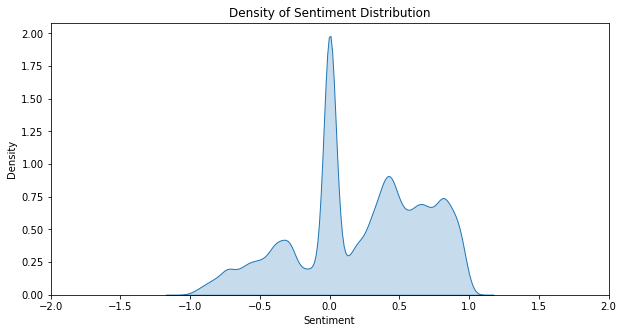

In [29]:
plt.figure(figsize=(10,5))
plt.xlim(-2, 2)
plt.title('Density of Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Density')
sns.kdeplot(train['LABEL_COLUMN'],shade=True)
plt.show()

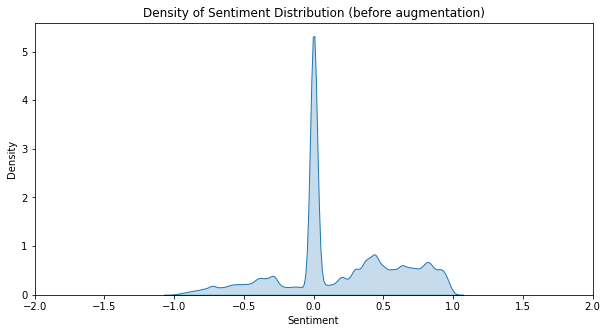

In [30]:
plt.figure(figsize=(10,5))
plt.xlim(-2, 2)
plt.title('Density of Sentiment Distribution (before augmentation)')
plt.xlabel('Sentiment')
plt.ylabel('Density')
sns.kdeplot(df['Vader_Comp'],shade=True)
plt.show()

In [31]:
train_InputExamples, validation_InputExamples = convert_data_to_examples(train, test, DATA_COLUMN, LABEL_COLUMN)

print('Train Input Examples Size:', len(train_InputExamples))
print('Validation Input Examples Size:', len(validation_InputExamples))


train_data = convert_examples_to_tf_dataset(list(train_InputExamples), tokenizer)
train_data = train_data.shuffle(100).batch(32).repeat(2)

validation_data = convert_examples_to_tf_dataset(list(validation_InputExamples), tokenizer)
validation_data = validation_data.batch(32)

Train Input Examples Size: 1061402
Validation Input Examples Size: 317335


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2308: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [32]:
import matplotlib.pyplot as plt

The BERT authors recommend fine-tuning for 4 epochs over the following hyperparameter options:
batch sizes: 8, 16, 32, 64, 128

learning rates: 3e-4, 1e-4, 5e-5, 3e-5

The learning rate has a very high negative correlation (-0.540) with model accuracy. Therefore, in our search space, lower learning rates are better.



In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=7e-8, epsilon=1e-08, clipnorm=1.0), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy('accuracy')])

history = model.fit(train_data, epochs=1, validation_data=validation_data)

    228/Unknown - 47s 116ms/step - loss: nan - accuracy: 0.9956

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('BERT-Based Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('BERT-Based Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
pred_sentences = ['This was an awesome movie. I watch it twice my time watching this beautiful movie if I have known it was this good',
                  'One of the worst movies of all time. I cannot believe I wasted two hours of my life for this movie']

In [ ]:
tf_batch = tokenizer(pred_sentences, max_length=128, padding=True, truncation=True, return_tensors='tf')
tf_outputs = model(tf_batch)
tf_predictions = tf.nn.softmax(tf_outputs[0], axis=-1)
labels = ['Negative','Positive']
label = tf.argmax(tf_predictions, axis=1)
label = label.numpy()
for i in range(len(pred_sentences)):
  print(pred_sentences[i], ": \n", labels[label[i]])

In [ ]:
# Save the entire model as a SavedModel.
!mkdir -p saved_model
model.save('saved_model/my_model') 

In [ ]:
# my_model directory
!ls saved_model

# Contains an assets folder, saved_model.pb, and variables folder.
!ls saved_model/my_model

In [ ]:
'''
new_model = tf.keras.models.load_model('saved_model/my_model')

# Check its architecture
new_model.summary()'''

In [ ]:
'''
Code to reload PT2:
# Evaluate the restored model
loss, acc = new_model.evaluate(test_images, test_labels, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

print(new_model.predict(test_images).shape)'''